In [2]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Draw subplot with different widths
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore') # Ignore python warning message

train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

train_df['date_time'] = pd.to_datetime(train_df['date_time']) # date_time:=> str -> Obj
test_df['date_time'] = pd.to_datetime(test_df['date_time'])

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/train.csv'

In [3]:
train_df.head()

NameError: name 'train_df' is not defined

In [4]:
print(f'Number of rows: {train_df.shape[0]}; Number of columns: {train_df.shape[1]}; No of missing value: {sum(train_df.isna().sum())}')

NameError: name 'train_df' is not defined

In [5]:
train_df.dtypes

NameError: name 'train_df' is not defined

In [6]:
train_df.describe()

NameError: name 'train_df' is not defined

In [7]:
features = [feature for feature in train_df.columns if feature not in ["date_time", "target_carbon_monoxide", 
                                                                       "target_benzene", "target_nitrogen_oxides"]]

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)

background_color = "#f6f5f5"

run_no = 0                                                 #locals ; returns the dictionary of the current namesapce
for row in range(0, 3):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', which=u'both',length=0)
        locals()["ax"+str(run_no)].set_yticklabels([])
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)  # Set top, right spine invisible 
        run_no += 1

run_no = 0
for col in features:
    sns.kdeplot(test_df[col], ax=locals()["ax"+str(run_no)], shade=True, color='#287094', alpha=0.95, linewidth=0, zorder=2)
    sns.kdeplot(train_df[col], ax=locals()["ax"+str(run_no)], shade=True, color='#fcd12a', alpha=0.95, linewidth=0, zorder=2)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=5, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=5, width=0.5, length=3)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.7)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.7)
    run_no += 1
    
ax0.text(-10, 0.086, 'Features Distribution', fontsize=8, fontweight='bold')
ax0.text(-10, 0.081, 'Features comparison between train and test dataset', fontsize=5)
fig.legend(['test', 'train'], ncol=2, facecolor=background_color, edgecolor=background_color, fontsize=4, bbox_to_anchor=(0.24, 0.91))
    
ax8.remove()

NameError: name 'train_df' is not defined

NameError: name 'train_df' is not defined

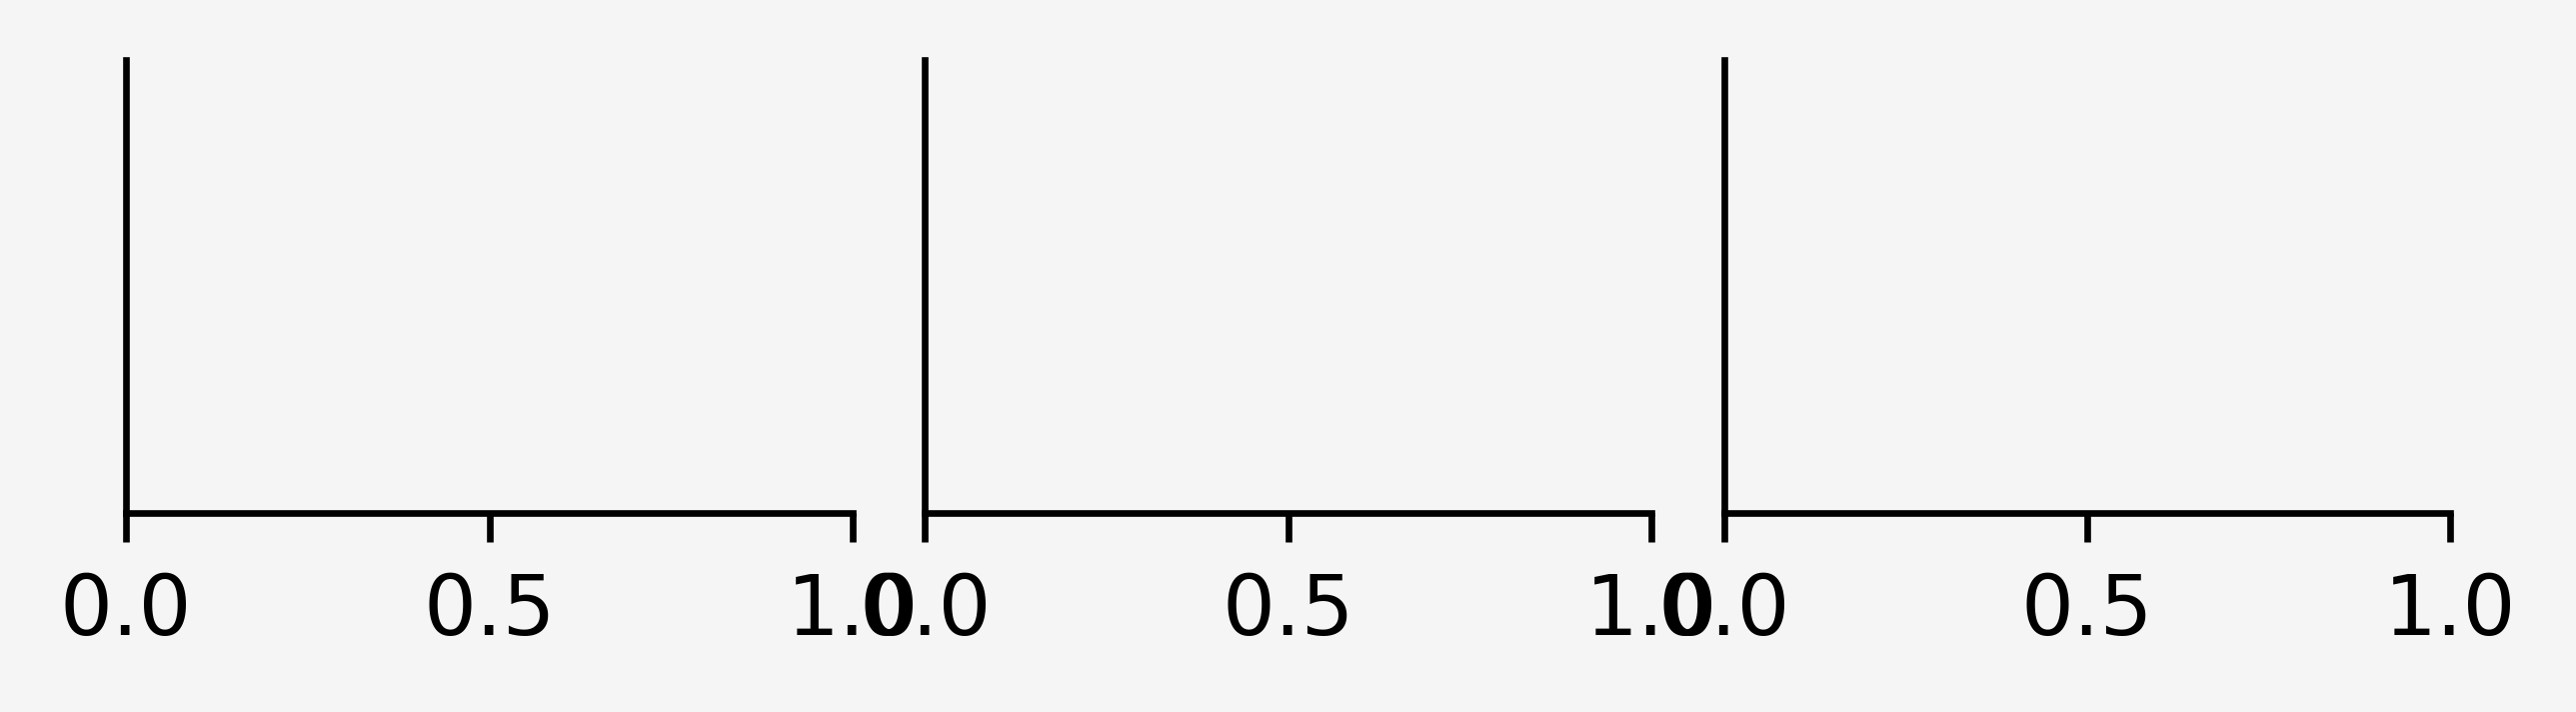

In [8]:
targets = ["target_carbon_monoxide", "target_benzene", "target_nitrogen_oxides"]

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.1, hspace=5)

background_color = "#f6f5f5"

run_no = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', which=u'both',length=0)
        locals()["ax"+str(run_no)].set_yticklabels([])
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for col in targets:
    sns.kdeplot(train_df[col], ax=locals()["ax"+str(run_no)], shade=True, color='#fcd12a', alpha=0.95, linewidth=0, zorder=2)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=5, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=5, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.7)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.7)
    run_no += 1
    
ax0.text(-1.2, 0.44, 'Target Distribution', fontsize=8, fontweight='bold')
ax0.text(-1.2, 0.40, 'Target variables are showing a lognormal distribution', fontsize=5)

plt.show()

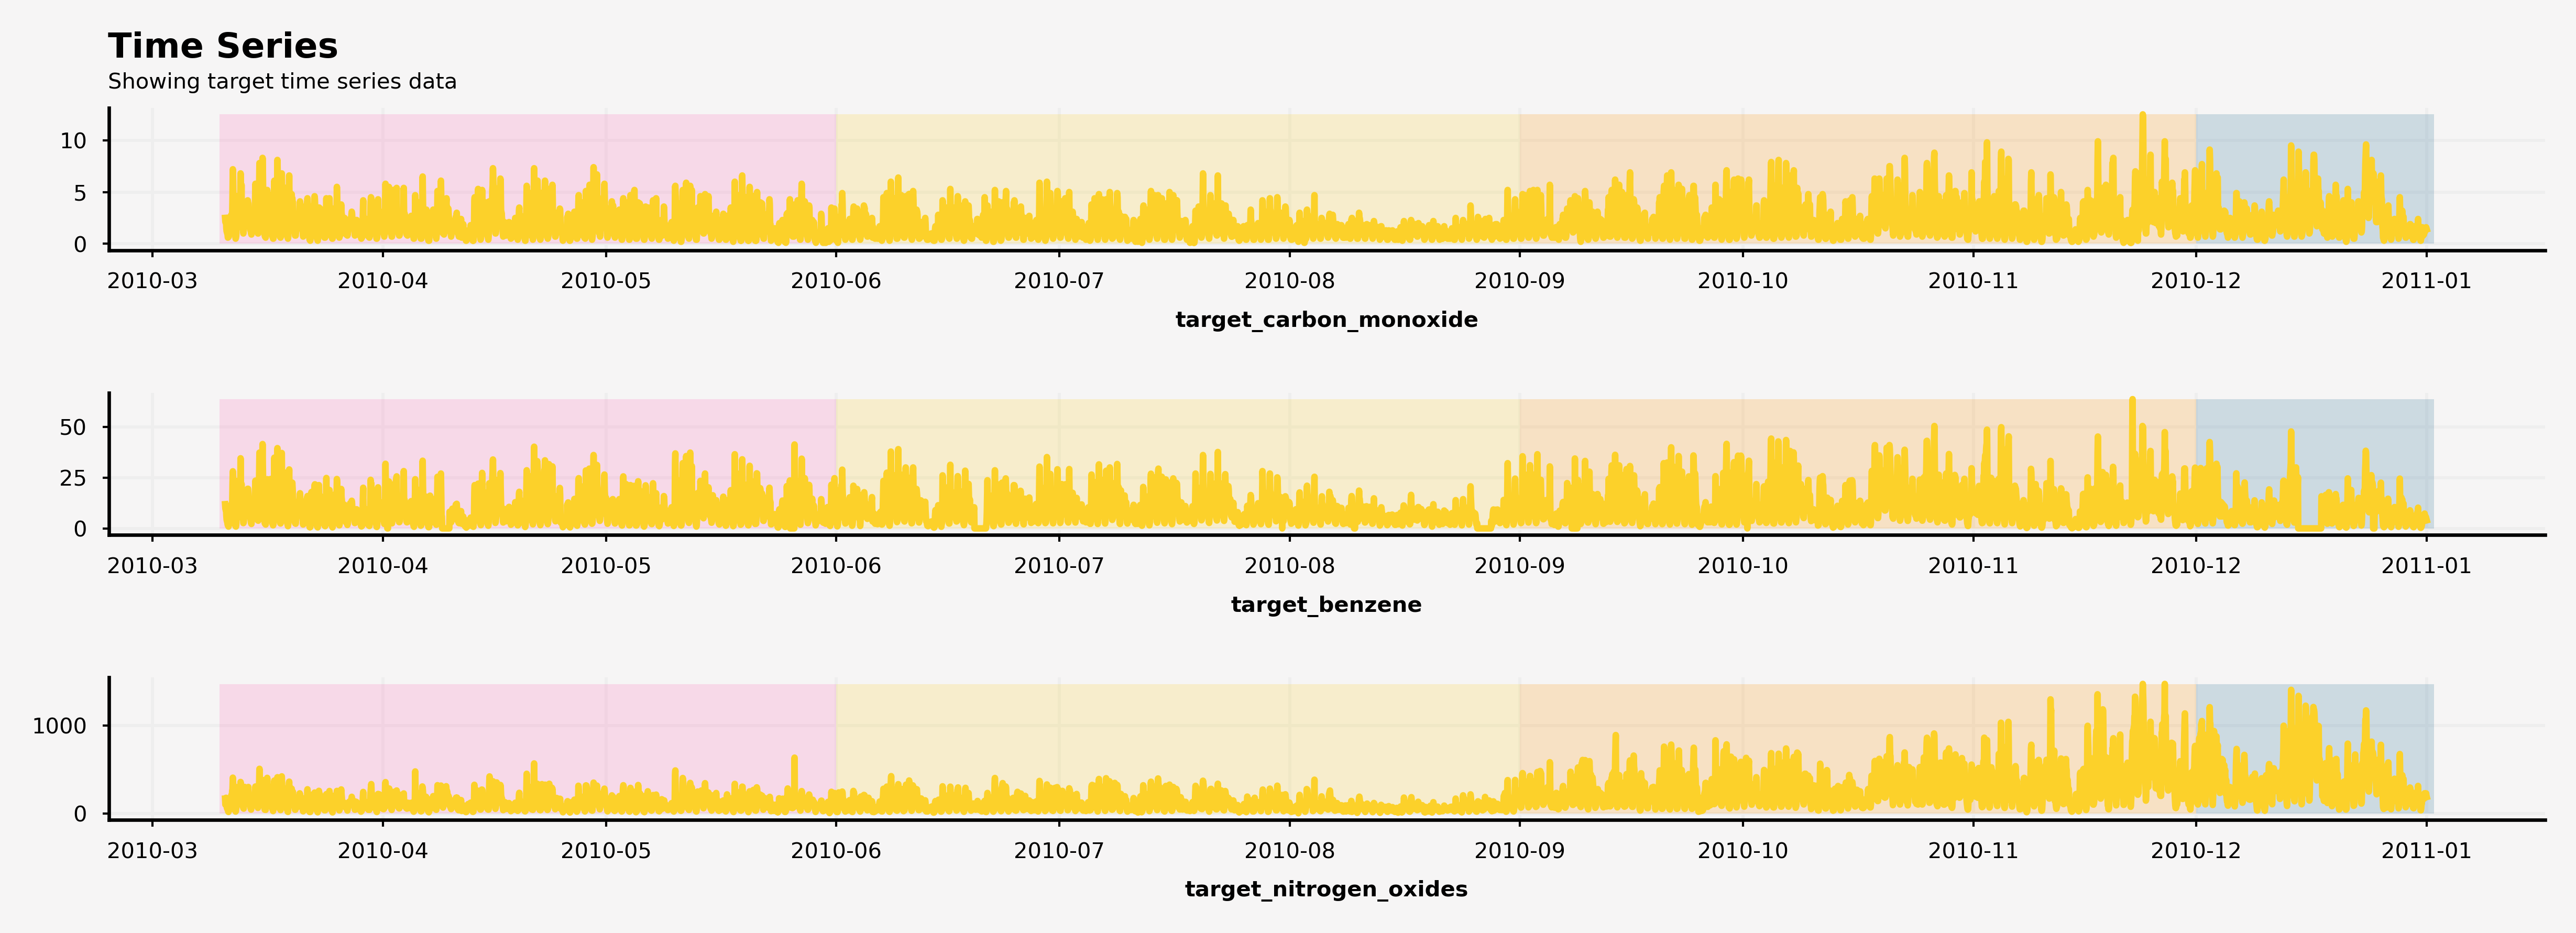

In [8]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(10,3), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0, hspace=1)

background_color = "#f6f5f5"

run_no = 0
for row in range(0, 3):
    for col in range(0, 1):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for col in targets:
    sns.lineplot(ax=locals()["ax"+str(run_no)], y=train_df[col], x=train_df['date_time'], color='#fcd12a', zorder=10)
    locals()["ax"+str(run_no)].set_ylabel('')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=5, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=5, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.7)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.7)
    spring = np.arange(np.datetime64("2010-03-10"), np.datetime64("2010-06-02"))
    locals()["ax"+str(run_no)].fill_between(spring, np.max(train_df[col]), color='#ff69b4', alpha=0.2, zorder=2, linewidth=0)
    summer = np.arange(np.datetime64("2010-06-01"), np.datetime64("2010-09-02"))
    locals()["ax"+str(run_no)].fill_between(summer, np.max(train_df[col]), color='#fcd12a', alpha=0.2, zorder=2, linewidth=0)
    autumn = np.arange(np.datetime64("2010-09-01"), np.datetime64("2010-12-02"))
    locals()["ax"+str(run_no)].fill_between(autumn, np.max(train_df[col]), color='#ff9200', alpha=0.2, zorder=2, linewidth=0)
    winter = np.arange(np.datetime64("2010-12-01"), np.datetime64("2011-01-03"))
    locals()["ax"+str(run_no)].fill_between(winter, np.max(train_df[col]), color='#287094', alpha=0.2, zorder=2, linewidth=0)
    run_no += 1
    
ax0.text(14663, 18, 'Time Series', fontsize=8, fontweight='bold')
ax0.text(14663, 15, 'Showing target time series data', fontsize=5)

plt.show()

In [1]:
chart_df = pd.DataFrame(train_df[features].corrwith(train_df['target_carbon_monoxide']))
chart_df.columns = ['corr']

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#00A4CCFF']*6)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = plt.bar(ax=ax, x=chart_df.index, y=chart_df['corr'], color='#fcd12a',
                      zorder=2, linewidth=0, alpha=1, saturation=1)
ax_sns.set_xlabel("Features",fontsize=4, weight='bold')
ax_sns.set_ylabel("Correlation",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax.text(-0.5, 1.25, 'Carbon Monoxide', fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 1.13, 'Correlation between carbon monoxide and feature values', fontsize=4, ha='left', va='top')
# data label
for p in ax.patches:
    percentage = f'{p.get_height():.2f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=4,
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    
plt.show()

NameError: name 'pd' is not defined

ValueError: Invalid RGBA argument: 'background_color'

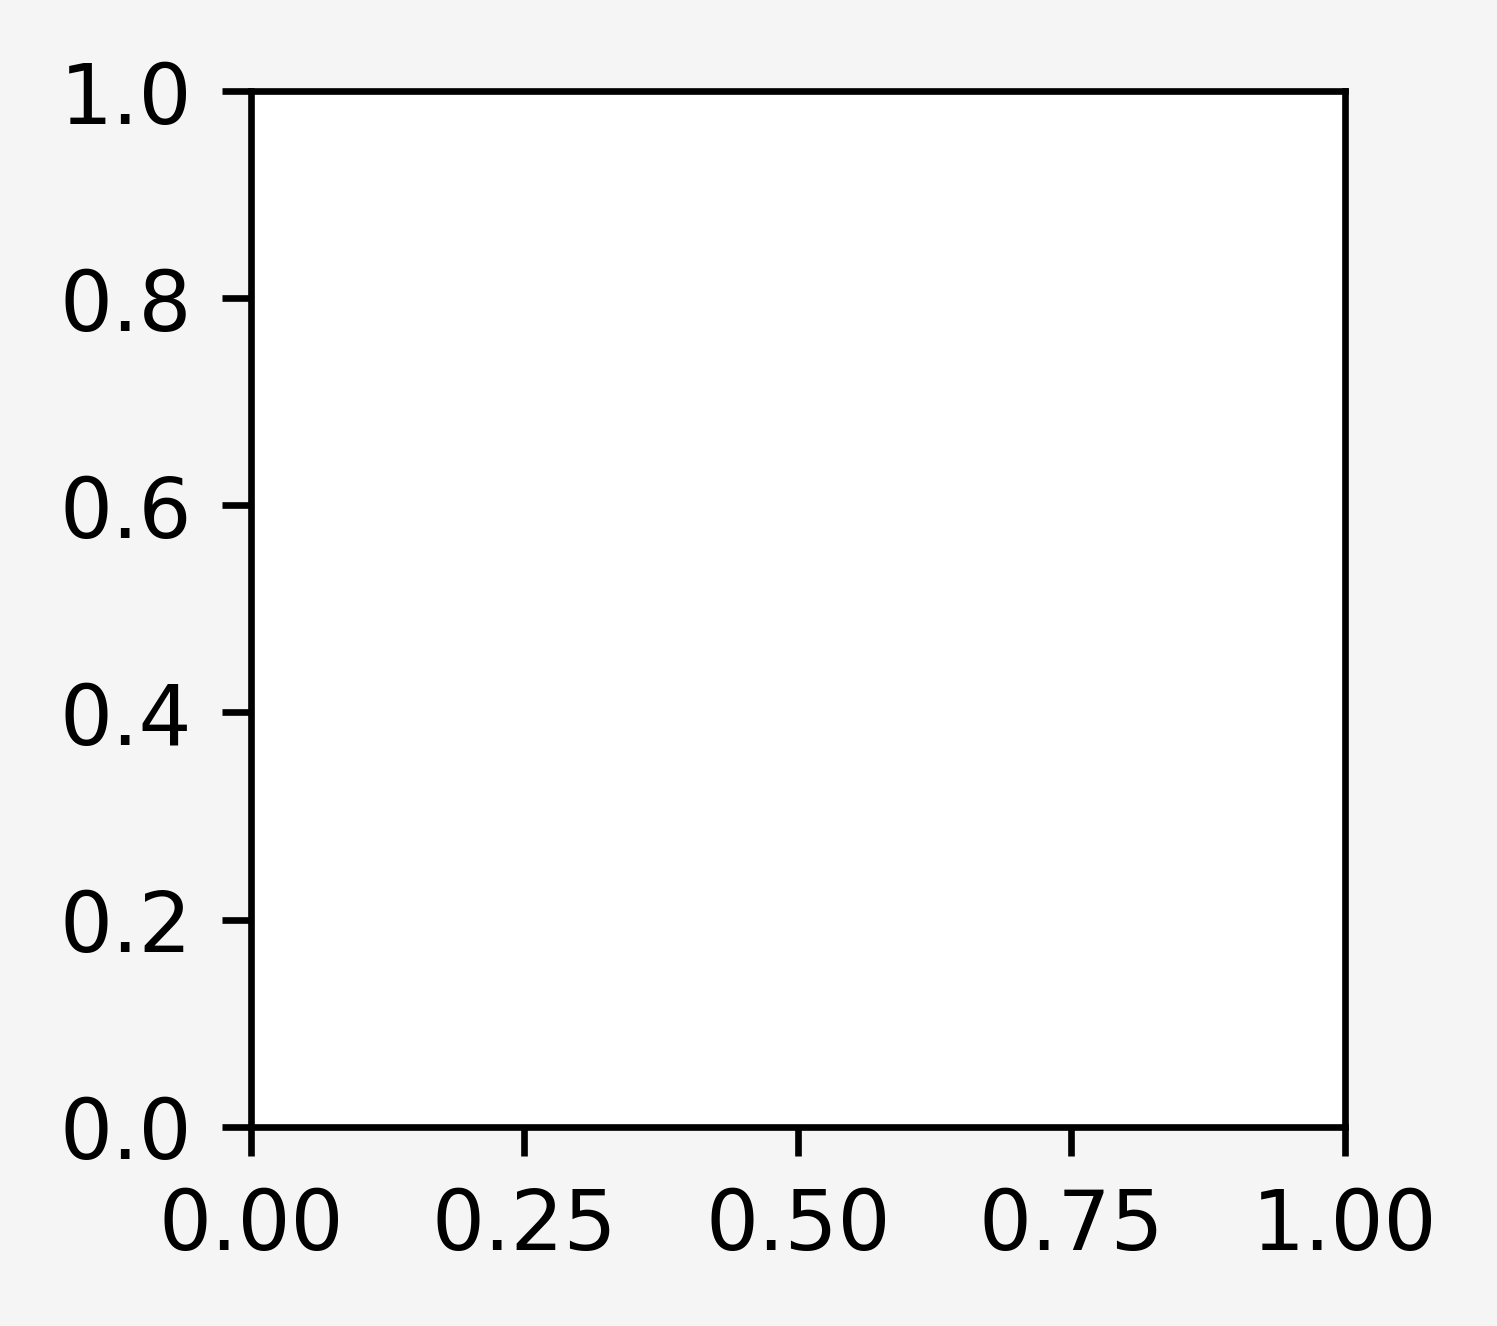

In [11]:
features = [feature for feature in train_df.columns if feature not in ["date_time", "target_carbon_monoxide", 
                                                                       "target_benzene", "target_nitrogen_oxides"]]

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(8, 8), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)

background_color = "#f6f5f5"
cmap = sns.light_palette('#f5c91d', as_cmap=True)

run_no = 0
for row in range(0, 3):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor('background_color')
        for s in ["top","right"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for col in features:
    locals()["ax"+str(run_no)].hexbin(x=train_df[col], y=train_df['target_carbon_monoxide'], gridsize=15, 
                                      cmap=cmap, zorder=2, mincnt=1)
    locals()["ax"+str(run_no)].set_ylabel('target_carbon_monoxide', fontsize=5, fontweight='bold')
    locals()["ax"+str(run_no)].set_xlabel(col, fontsize=5, fontweight='bold')
    locals()["ax"+str(run_no)].tick_params(labelsize=5, width=0.5, length=1.5)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.7)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.7)
    run_no += 1
    
ax0.text(0, 14.5, 'Carbon Monoxide', fontsize=10, fontweight='bold')
ax0.text(0, 13.6, 'Hexabin plot between features and carbon monoxide', fontsize=7)

ax8.remove()

# Matplotlib 
- rcParams: Able to set plot configuration
- Spaines: the line nothing the data area boundaries
- figure(): func that make figure and edit
    - figsize: define figure size
    - add_gridsoec: return a GridSpec that has this figure as a parent
    - if spec is exist -> Can create subplot in spec
- grid: Setting plot grid
- update: Setting width, height space 
- hue: Seperate variable by Color, ...
- zorder: Z-axis order Higher order go up layer
- fill_between: Fill polygon which is made by given coordinate
- ax.patches: return bars produced by barplot

<br>

---


# python 
- locals: Returns the dictionary of the current namesapce


---

# Seaborn
- kdeplot: A Kernel density estimate plot is a method for visualizing the distribution <br>of observations in a dataset == histogram
- barplot: Show point estimates and confidence intervals as rectangular bars.
- lineplot: Draw a line plot with possibility of several semantic groupings.

---

# Numpy
- arange: Return array constituted of step made by [start, stop)

----
# Pandas
- corrwith: Compute pairwise correlation